<AxesSubplot:>

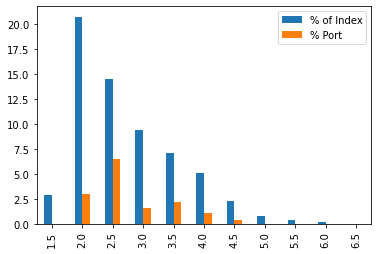

In [1]:
#Importing pandas for dataframe
import pandas as pd

#Importing both the index csv and portfolio holdings
df_index = pd.read_csv(r'C:\Users\Redacted\Desktop\Python Files\Index.csv')
df_port = pd.read_csv(r'C:\Users\Redacted\Desktop\Python Files\Bonds.csv')

#Removing column truncation and bringing in max rows and column width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#Sorting values to show highest weighting in the index
df_index.sort_values(by='Weight', ascending=False)

#Bringing in only coupon and weight columns of the index
df_index = df_index[['Coupon','Weight']]

#Summing the weightings of the index by coupon
df_index = df_index.groupby('Coupon').sum()

#Bringing in coupon and % port columns from holdings detail
df_port = df_port[['Cpn', '% Port']]

#Again making sure to sum the weights of the portfolio by coupon
df_port = df_port.groupby('Cpn').sum()

#Renaming index column
df_index = df_index.rename({'Weight': '% of Index',}, axis=1)

#Combining both data frames
result = pd.concat([df_index, df_port], axis=1)

#Plotting on bar chart
result.plot.bar()
